In [1]:
# The following code includes bagging with decision trees
# best parameters are identified using grid search with cross validation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [2]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
churn.shape

(3333, 21)

In [3]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [4]:
2850/(2850+483)

0.8550855085508551

In [5]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [6]:
# check if any NA values
churn.isnull().values.any()

False

In [7]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=['Churn'])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 19)


In [8]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 19)
(2666, 1)
(667, 19)
(667, 1)


In [9]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [10]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [11]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
print(np.unique(X_train.State,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), array([45, 63, 47, 48, 27, 49, 59, 43, 52, 51, 47, 45, 38, 58, 46, 51, 62,
       45, 41, 54, 50, 50, 59, 69, 51, 51, 60, 54, 48, 53, 48, 51, 51, 50,
       63, 62, 52, 62, 37, 50, 49, 48, 44, 50, 55, 62, 52, 54, 62, 82, 66],
      dtype=int64))


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
# split the Train data into Categorical and non-categorical
catcols = ['State', 'AreaCode']
X_train_cat = pd.DataFrame(X_train, columns=catcols)
print(X_train_cat.shape)
X_train_cont = X_train.copy()
X_train_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_train_cont.shape)
X_train_cont.reset_index(drop=True,inplace=True)

(2666, 2)
(2666, 17)


In [13]:
# split the Test data into Categorical and non-categorical
X_test_cat = pd.DataFrame(X_test, columns=catcols)
print(X_test_cat.shape)
X_test_cont = X_test.copy()
print(X_test_cont.columns)
X_test_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_test_cont.shape)
X_test_cont.reset_index(drop=True,inplace=True)

(667, 2)
Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'],
      dtype='object')
(667, 17)


In [14]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(2666, 54)
(667, 54)


In [15]:
# convert back array into data frame
X_train_cat3 = pd.DataFrame(X_train_cat2)
print(X_train_cat3.shape)
X_test_cat3 = pd.DataFrame(X_test_cat2)
print(X_test_cat3.shape)

(2666, 54)
(667, 54)


In [16]:
# merge continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont,X_train_cat3],axis=1,join='outer',ignore_index=False)
X_test_final = pd.concat([X_test_cont,X_test_cat3],axis=1,join='outer',ignore_index=False)
print(X_train_final.shape)
print(X_test_final.shape)

(2666, 71)
(667, 71)


In [23]:
# Bagging Classifier
# build decision tree object
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier(class_weight='balanced', max_depth = 4)
# build bagging object
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(base_estimator = CART, 
                           verbose = 10, oob_score = False,
                            random_state = 1)
# build grid search parameters
parms = {'n_estimators' : [5,10,15],
          'bootstrap':[True,False],
          'max_samples':[0.3,0.6,0.9],
          'max_features':[1.0]
        }
# grid search
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = Bagging,param_grid = parms, scoring = 'f1_macro',
                  cv=3, refit=True,return_train_score = True, verbose=10)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=5, score=(train=0.815, test=0.790), total=   0.0s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estima

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema


Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=5, score=(train=0.809, test=0.777), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.831, test=0.796), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.871, test=0.835), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.823, test=0.803), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15, score=(train=0.832, test=0.804), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this paralle

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15, score=(train=0.862, test=0.816), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this paralle

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.3, n_estimators=15, score=(train=0.830, test=0.806), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent worke

Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.834, test=0.806), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.854, test=0.818), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.810, test=0.784), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=10, score=(train=0.822, test=0.792), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=10, score=(train=0.825, test=0.807), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=15, score=(train=0.819, test=0.763), total=   0.3s
[CV] bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel r

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[CV]  bootstrap=True, max_features=1.0, max_samples=0.6, n_estimators=15, score=(train=0.825, test=0.808), total=   0.3s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.800, test=0.756), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.807, test=0.796), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.797, test=0.791), total=   0.1s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.817, test=0.771), total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.813, test=0.795), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.821, test=0.814), total=   0.2s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel r

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=15, score=(train=0.825, test=0.799), total=   0.3s
[CV] bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this paralle

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=True, max_features=1.0, max_samples=0.9, n_estimators=15, score=(train=0.825, test=0.811), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5, score=(train=0.783, test=0.750), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5, score=(train=0.837, test=0.818), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=5, score=(train=0.817, test=0.804), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.826, test=0.793), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.847, test=0.813), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=10, score=(train=0.834, test=0.825), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=15, score=(train=0.827, test=0.787), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=15, score=(train=0.847, test=0.812), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.3, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.803, test=0.761), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.810, test=0.788), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=5, score=(train=0.800, test=0.781), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10, score=(train=0.799, test=0.755), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10, score=(train=0.838, test=0.801), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=10, score=(train=0.833, test=0.810), total=   0.2s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=15, score=(train=0.800, test=0.763), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=15, score=(train=0.851, test=0.805), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=0.6, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0


Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.801, test=0.775), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Paral


Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.813, test=0.782), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=5 
Building estimator 1 of 5 for this parallel run (total 5)...
Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=5, score=(train=0.797, test=0.784), total=   0.1s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.769, test=0.738), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.817, test=0.786), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=10 
Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=10, score=(train=0.795, test=0.783), total=   0.3s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=15, score=(train=0.774, test=0.744), total=   0.4s
[CV] bootstrap=False, max_features=1.0, max_samples=0.9, n_estimators=15 
Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Building estimator 1 of 15 for this parallel run (total 15)...
Building estimator 2 of 15 for this parallel run (total 15)...
Building estimator 3 of 15 for this parallel run (total 15)...
Building estimator 4 of 15 for this parallel run (total 15)...
Building estimator 5 of 15 for this parallel run (total 15)...
Building estimator 6 of 15 for this parallel run (total 15)...
Building estimator 7 of 15 for this parallel run (total 15)...
Building estimator 8 of 15 for this parallel run (total 15)...
Building estimator 9 of 15 for this parallel run (total 15)...
Building estimator 10 of 15 for this parallel run (total 15)...
Building estimator 11 of 15 for this parallel run (total 15)...
Building estimator 12 of 15 for this parallel run (total 15)...
Building estimator 13 of 15 for this parallel run (total 15)...
Building estimator 14 of 15 for this parallel run (total 15)...
Building estimator 15 of 15 for this parallel run (total 15)...
[CV]  bootstrap=False, max_features=1.0, max_sam

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight='balanced',
                                                                               criterion='gini',
                                                                               max_depth=4,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                      

In [20]:
# check CV results
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_Bagging_2.xlsx')

In [24]:
CV.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 0.3,
 'n_estimators': 10}

In [25]:
print(CV.best_score_)

0.8116366003617319


In [26]:
for model in CV.best_estimator_.estimators_:
    print(model.predict(X_test_final[0:1]))
print("final Prediction: ", CV.best_estimator_.predict(X_test_final[0:1]))

[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
final Prediction:  [1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [27]:
predict = np.zeros([1,2])
for model in CV.best_estimator_.estimators_:
    predict = np.vstack((predict,model.predict_proba(X_test_final[0:1])))
predict = predict[1:]
print(predict)
print("average: ",np.mean(predict,axis=0))
print("final Prediction: ", 
      CV.best_estimator_.predict_proba(X_test_final[0:1]))

[[0.05243993 0.94756007]
 [0.58417139 0.41582861]
 [0.4390515  0.5609485 ]
 [0.05678823 0.94321177]
 [0.0800081  0.9199919 ]
 [1.         0.        ]
 [0.09449761 0.90550239]
 [0.09643816 0.90356184]
 [0.1609129  0.8390871 ]
 [0.11615135 0.88384865]]
average:  [0.26804592 0.73195408]
final Prediction:  [[0.26804592 0.73195408]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [28]:
# Preidct on Test data and check the confusion matrix
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["class0","class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[[0.26804592 0.73195408]
 [0.86010813 0.13989187]
 [0.88724095 0.11275905]
 [0.88724095 0.11275905]
 [0.0959325  0.9040675 ]]
[1 0 0 0 1]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [29]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[520  59]
 [ 18  70]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       579
           1       0.54      0.80      0.65        88

    accuracy                           0.88       667
   macro avg       0.75      0.85      0.79       667
weighted avg       0.91      0.88      0.89       667



In [30]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb.class1)
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
FPR, TPR, THR = roc_curve(Y_test, PProb.class1)

0.8973739990579368


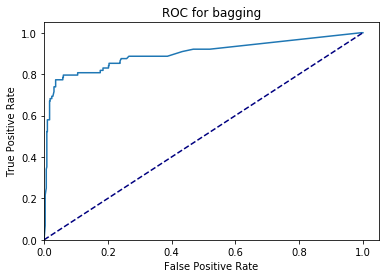

In [31]:
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for bagging')
plt.show()

In [32]:
ROC = pd.DataFrame({"THR":THR,
                   "TPR":TPR,
                   "FPR":FPR})
ROC.to_excel('ROC_Bagging.xlsx')

In [33]:
pclass = list()
for prob in PProb.class1:
    if prob >= 0.5893:
        pclass.append(1)
    else:
        pclass.append(0)
print(PProb.class1.head())
print(pclass[0:5])

0    0.731954
1    0.139892
2    0.112759
3    0.112759
4    0.904068
Name: class1, dtype: float64
[1, 0, 0, 0, 1]


In [34]:
print (confusion_matrix(Y_test,pclass))
print (classification_report(Y_test,pclass))

[[544  35]
 [ 18  70]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       579
           1       0.67      0.80      0.73        88

    accuracy                           0.92       667
   macro avg       0.82      0.87      0.84       667
weighted avg       0.93      0.92      0.92       667

